In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


In [ ]:
overwrite = False
dataset_name = 'syn_gt'
attr_suffix = '_at' 
suffix = '_test' 


with open('run/data.py', 'r') as file:
    exec(file.read())

syn_gt_at_self
{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                                210
No trend. No seasonal pattern. No sharp shifts. The time series exhibits high variab

# Model (customizable)

In [3]:
with open('run/model.py', 'r') as file:
    exec(file.read())

syn_gt_at_self1
Layer (type:depth-idx)                                                 Param #
VITAL                                                                  --
├─TSEncoder: 1-1                                                       --
│    └─LocalNorm: 2-1                                                  --
│    └─PatchCNNTSEncoder: 2-2                                          --
│    │    └─ModuleList: 3-1                                            1,234,448
│    │    └─LayerNorm: 3-2                                             1,536
├─TextEncoder: 1-2                                                     --
│    └─PatchMLPTextEncoder: 2-3                                        --
│    │    └─ModuleList: 3-3                                            2,959,104
├─TSDecoder: 1-3                                                       --
│    └─SelfAttnDecoder: 2-4                                            --
│    │    └─PositionalEncoding: 3-4                                    --


# Train

In [ ]:
config_dict['target_ratio'] = 10
with open('run/train_2steps.py', 'r') as file:
    exec(file.read())


Epoch [0/1000] 2.35s
	Training Loss: 829.489814
	Testing Loss: 688.858261
	Learning Rate: 0.000100000
	alpha: 1.0, beta: 0.0
Epoch [10/1000] 2.23s
	Training Loss: 819.089954
	Testing Loss: 682.604660
	Learning Rate: 0.000100000
	alpha: 1.0, beta: 0.0


# Generation

100    No trend.
Name: segment1, dtype: object


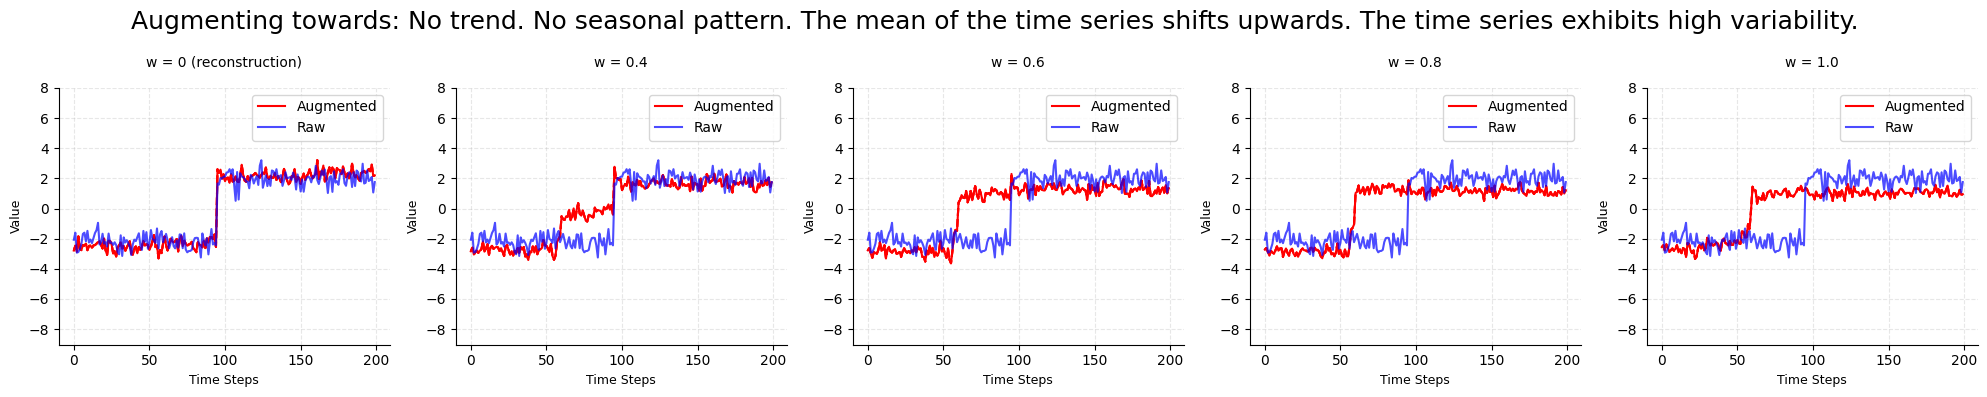

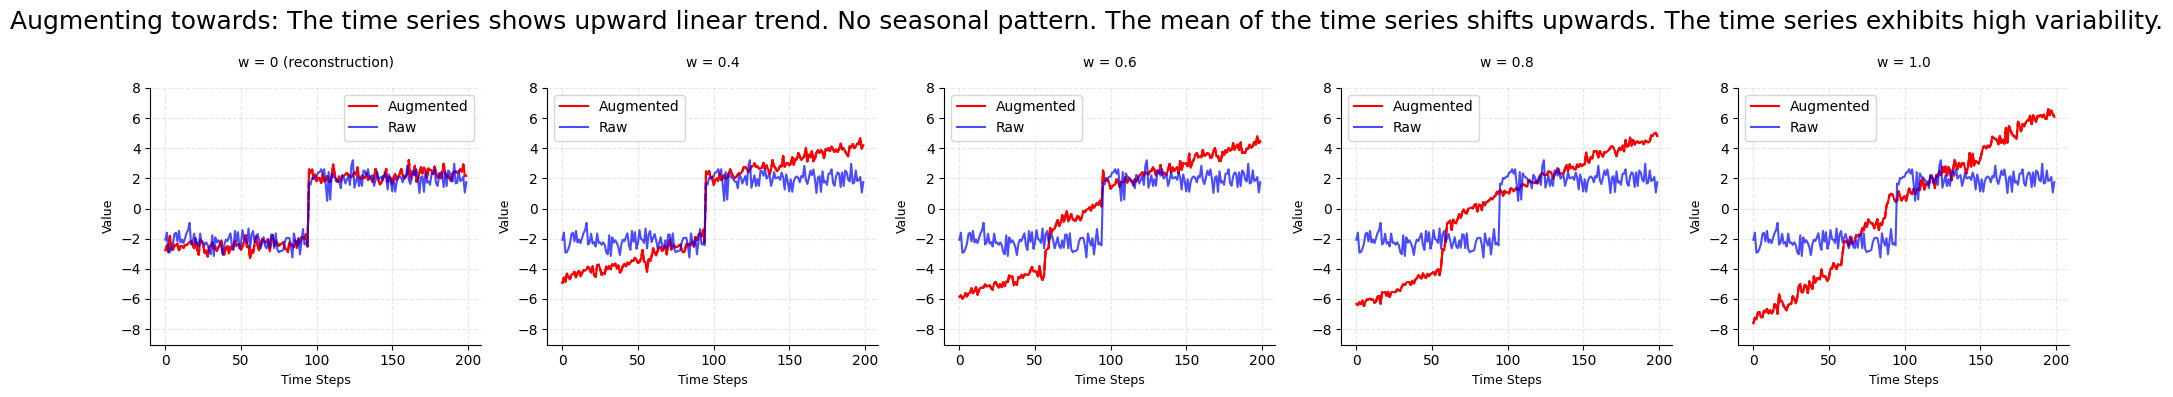

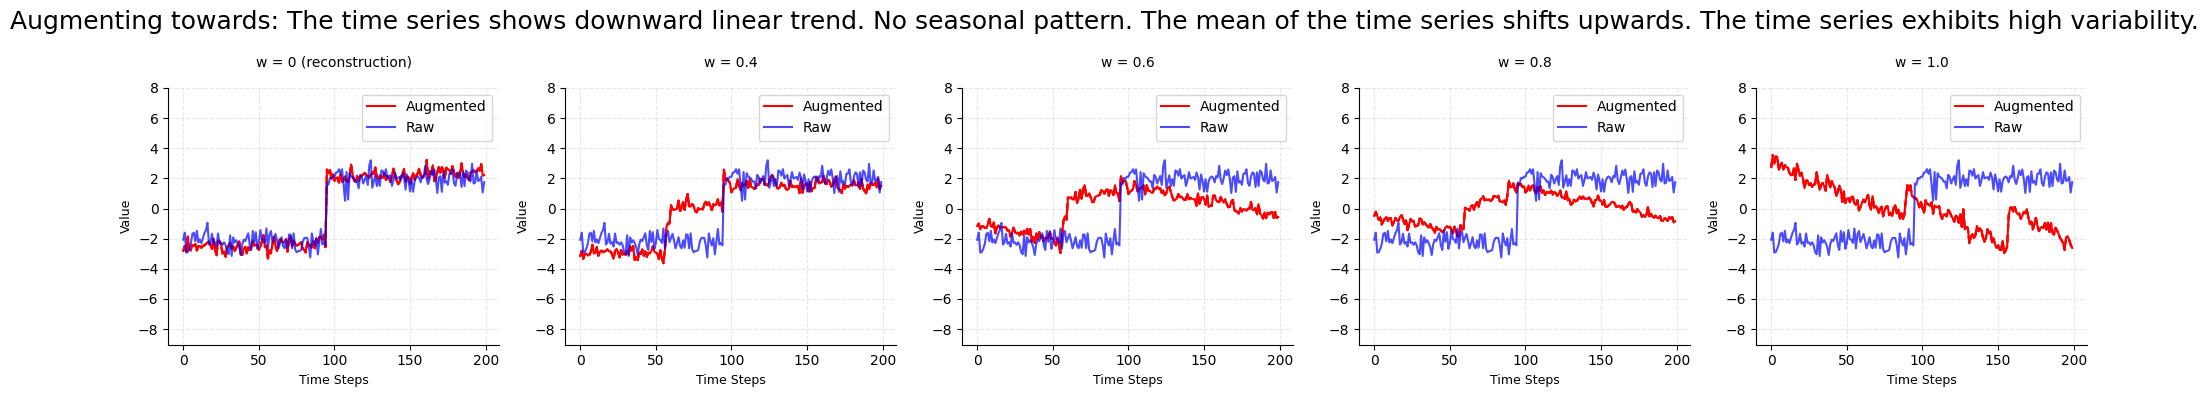

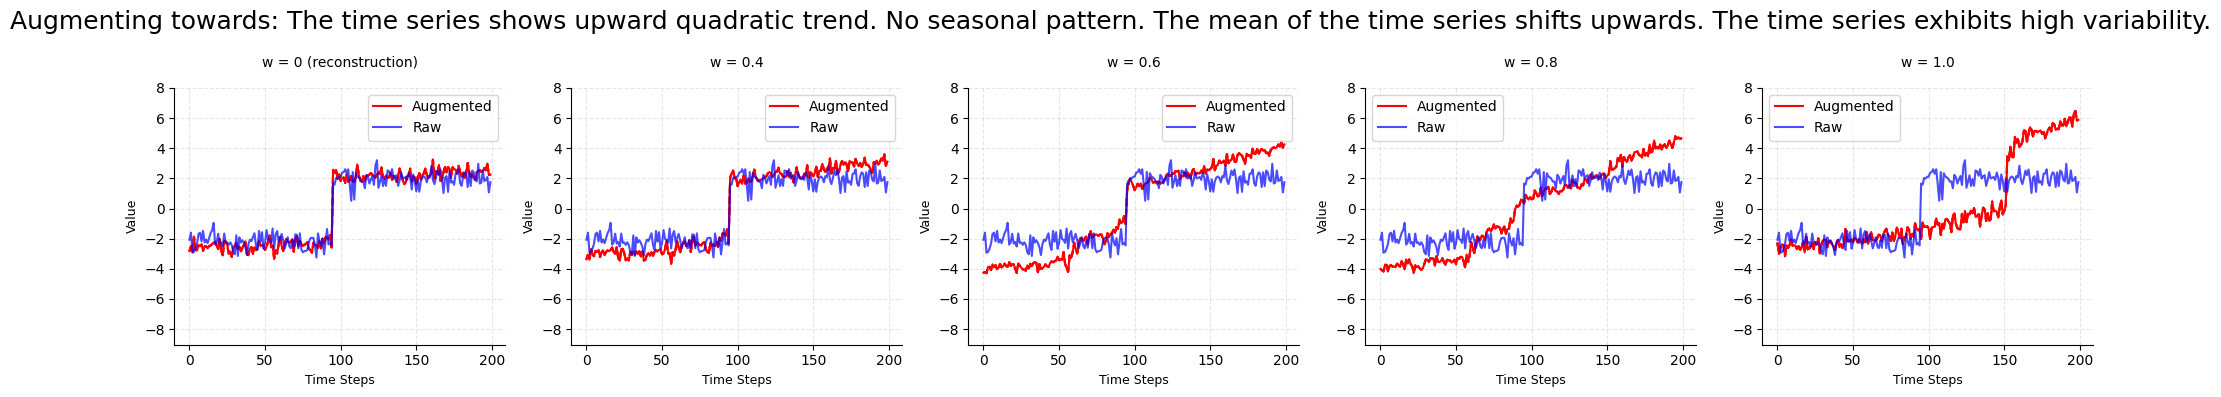

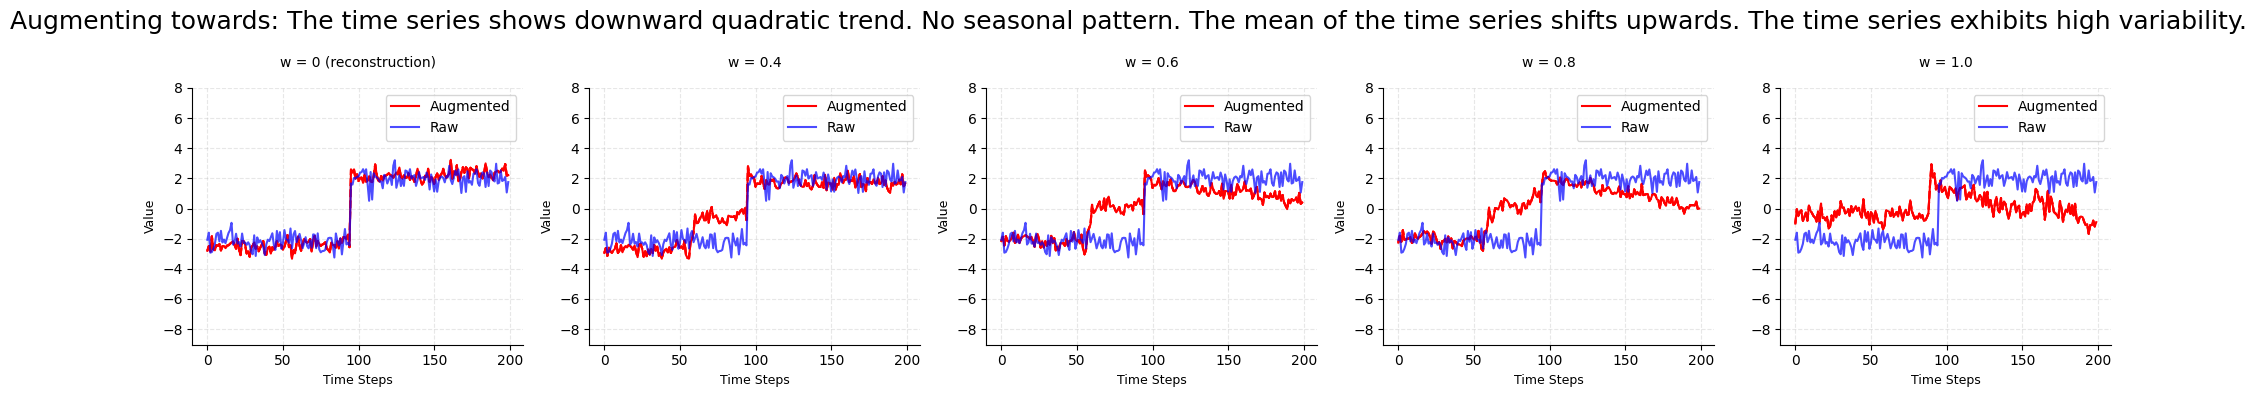

100    The time series shows upward linear trend.
Name: segment1, dtype: object


KeyboardInterrupt: 

In [5]:
tid=100
viz_generation_conditional(df_left, model, config_dict, tid=tid, sampling=True, b=1, ep=1)

In [ ]:
w = 0.8
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())


In [7]:
summarize_scores(df_all)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW distance decrease ↓,LCSS similarity increase ↑,RaTS ↑,|RaTS (preserved)|↓
final_score,2.01 (1.90),1.04 (0.55),-15.29 (13.72),0.23 (0.29),8.71 (5.47),0.37 (1.49)
